# Clean original data from CAP dataset

In [1]:
import os 
import os.path as op
import numpy as np
import mne
import pandas as pd
%matplotlib qt

### Define paths

In [2]:
path = '/home/jerry/python_projects/space/closedloop/test_data'
sbj = 'n10'
data_fname = op.join(path, sbj + '.edf')
raw_fname = op.join(path, sbj + '_raw.fif')
eve_fname = op.join(path, sbj + '_eve.fif')
annot_fname = op.join(path, sbj + '.txt')

Gtk-Message: 15:57:00.375: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:57:00.375: Failed to load module "canberra-gtk-module"


In [3]:
raw = mne.io.read_raw_edf(data_fname, preload=True)
# raw.save(raw_fname)
# raw = mne.io.read_raw(raw_fname)
# eve = mne.read_annotations(annot_fname)

Extracting EDF parameters from /home/jerry/python_projects/space/closedloop/test_data/n10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15052799  =      0.000 ... 29399.998 secs...


In [4]:
raw.ch_names

['Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'F8-T4',
 'T4-T6',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'F7-T3',
 'T3-T5',
 'C4-A1',
 'ROC-LOC',
 'EMG1-EMG2',
 'ECG1-ECG2',
 'DX1-DX2',
 'SX1-SX2']

### Assign channel type
#### Each subject had a different set of channels, this passage was manually implemented

In [5]:
# subject n1
# ch_types = {'ROC-LOC': 'eog',
#             'LOC-ROC': 'eog',
#             'F2-F4': 'eeg',
#             'F4-C4': 'eeg',
#             'C4-P4': 'eeg',
#             'P4-O2': 'eeg',
#             'F1-F3': 'eeg',
#             'F3-C3': 'eeg',
#             'C3-P3': 'eeg',
#             'P3-O1': 'eeg',
#             'C4-A1': 'eeg',
#             'EMG1-EMG2': 'emg',
#             'ECG1-ECG2': 'ecg',
#             'TERMISTORE': 'temperature',
#             'TORACE': 'resp',
#             'ADDOME': 'resp',
#             'Dx1-DX2': 'misc',
#             'SX1-SX2': 'misc',
#             'Posizione': 'misc',
#             'HR': 'misc',
#             'SpO2': 'misc'}
# subject n2
# ch_types = {'Fp2-F4': 'eeg',
#             'F4-C4': 'eeg',
#             'C4-P4': 'eeg',
#             'P4-O2': 'eeg',
#             'C4-A1': 'eeg',
#             'ROC-LOC': 'eog',
#             'EMG1-EMG2': 'emg',
#             'ECG1-ECG2': 'ecg',
#             'DX1-DX2': 'misc',
#             'SX1-SX2': 'misc',
#             'SAO2': 'misc',
#             'HR': 'misc',
#             'PLETH': 'misc',
#             'STAT': 'misc',
#             'MIC': 'misc'}
# subject n3
# ch_types = {'Fp2-F4': 'eeg',
#             'F4-C4': 'eeg',
#             'C4-P4': 'eeg',
#             'P4-O2': 'eeg',
#             'F8-T4': 'eeg',
#             'T4-T6': 'eeg',
#             'FP1-F3': 'eeg',
#             'F3-C3': 'eeg',
#             'C3-P3': 'eeg',
#             'P3-O1': 'eeg',
#             'F7-T3': 'eeg',
#             'T3-T5': 'eeg',
#             'C4-A1': 'eeg',
#             'ROC-LOC': 'eog',
#             'EMG1-EMG2': 'emg',
#             'ECG1-ECG2': 'ecg',
#             'DX1-DX2': 'misc',
#             'SX1-SX2': 'misc',
#             'SAO2': 'misc',
#             'HR': 'misc',
#             'PLETH': 'misc',
#             'STAT': 'misc',
#             'MIC': 'misc'}
# subject n4
# ch_types = {'EOG dx': 'eog',
#             'Fp2-F4': 'eeg',
#             'F4-C4': 'eeg',
#             'C4-P4': 'eeg',
#             'P4-O2': 'eeg',
#             'C4-A1': 'eeg',
#             'milo': 'misc',
#             'EOG sin': 'eog',
#             'tib dx': 'misc',
#             'tib sin': 'misc',
#             'cannula': 'misc',
#             'toracico': 'misc',
#             'ekg': 'ecg',
#             'deltoide': 'emg',
#             'Heart Rate Varia': 'misc',
#             'Flattening': 'misc',
#             'Flow': 'misc'}
# subject n5
# ch_types = {'Fp2-F4': 'eeg',
#             'F4-C4': 'eeg',
#             'C4-P4': 'eeg',
#             'P4-O2': 'eeg',
#             'F8-T4': 'eeg',
#             'T4-T6': 'eeg',
#             'FP1-F3': 'eeg',
#             'F3-C3': 'eeg',
#             'C3-P3': 'eeg',
#             'P3-O1': 'eeg',
#             'F7-T3': 'eeg',
#             'T3-T5': 'eeg',
#             'C4-A1': 'eeg',
#             'ROC-LOC': 'eog',
#             'EMG1-EMG2': 'emg',
#             'ECG1-ECG2': 'ecg',
#             'DX1-DX2': 'misc',
#             'SX1-SX2': 'misc',
#             'SAO2': 'misc',
#             'HR': 'misc',
#             'PLETH': 'misc',
#             'STAT': 'misc',
#             'MIC': 'misc'}
# subject n10
ch_types = {'Fp2-F4': 'eeg',
            'F4-C4': 'eeg',
            'C4-P4': 'eeg',
            'P4-O2': 'eeg',
            'F8-T4': 'eeg',
            'T4-T6': 'eeg',
            'FP1-F3': 'eeg',
            'F3-C3': 'eeg',
            'C3-P3': 'eeg',
            'P3-O1': 'eeg',
            'F7-T3': 'eeg',
            'T3-T5': 'eeg',
            'C4-A1': 'eeg',
            'ROC-LOC': 'eog',
            'EMG1-EMG2': 'emg',
            'ECG1-ECG2': 'ecg',
            'DX1-DX2': 'misc',
            'SX1-SX2': 'misc'}
raw.set_channel_types(ch_types)

/tmp/ipykernel_1709/4066467562.py:124: RuntimeWarning: The unit for channel(s) DX1-DX2, SX1-SX2 has changed from V to NA.
  raw.set_channel_types(ch_types)


<RawEDF | n10.edf, 18 x 15052800 (29400.0 s), ~2.02 GB, data loaded>

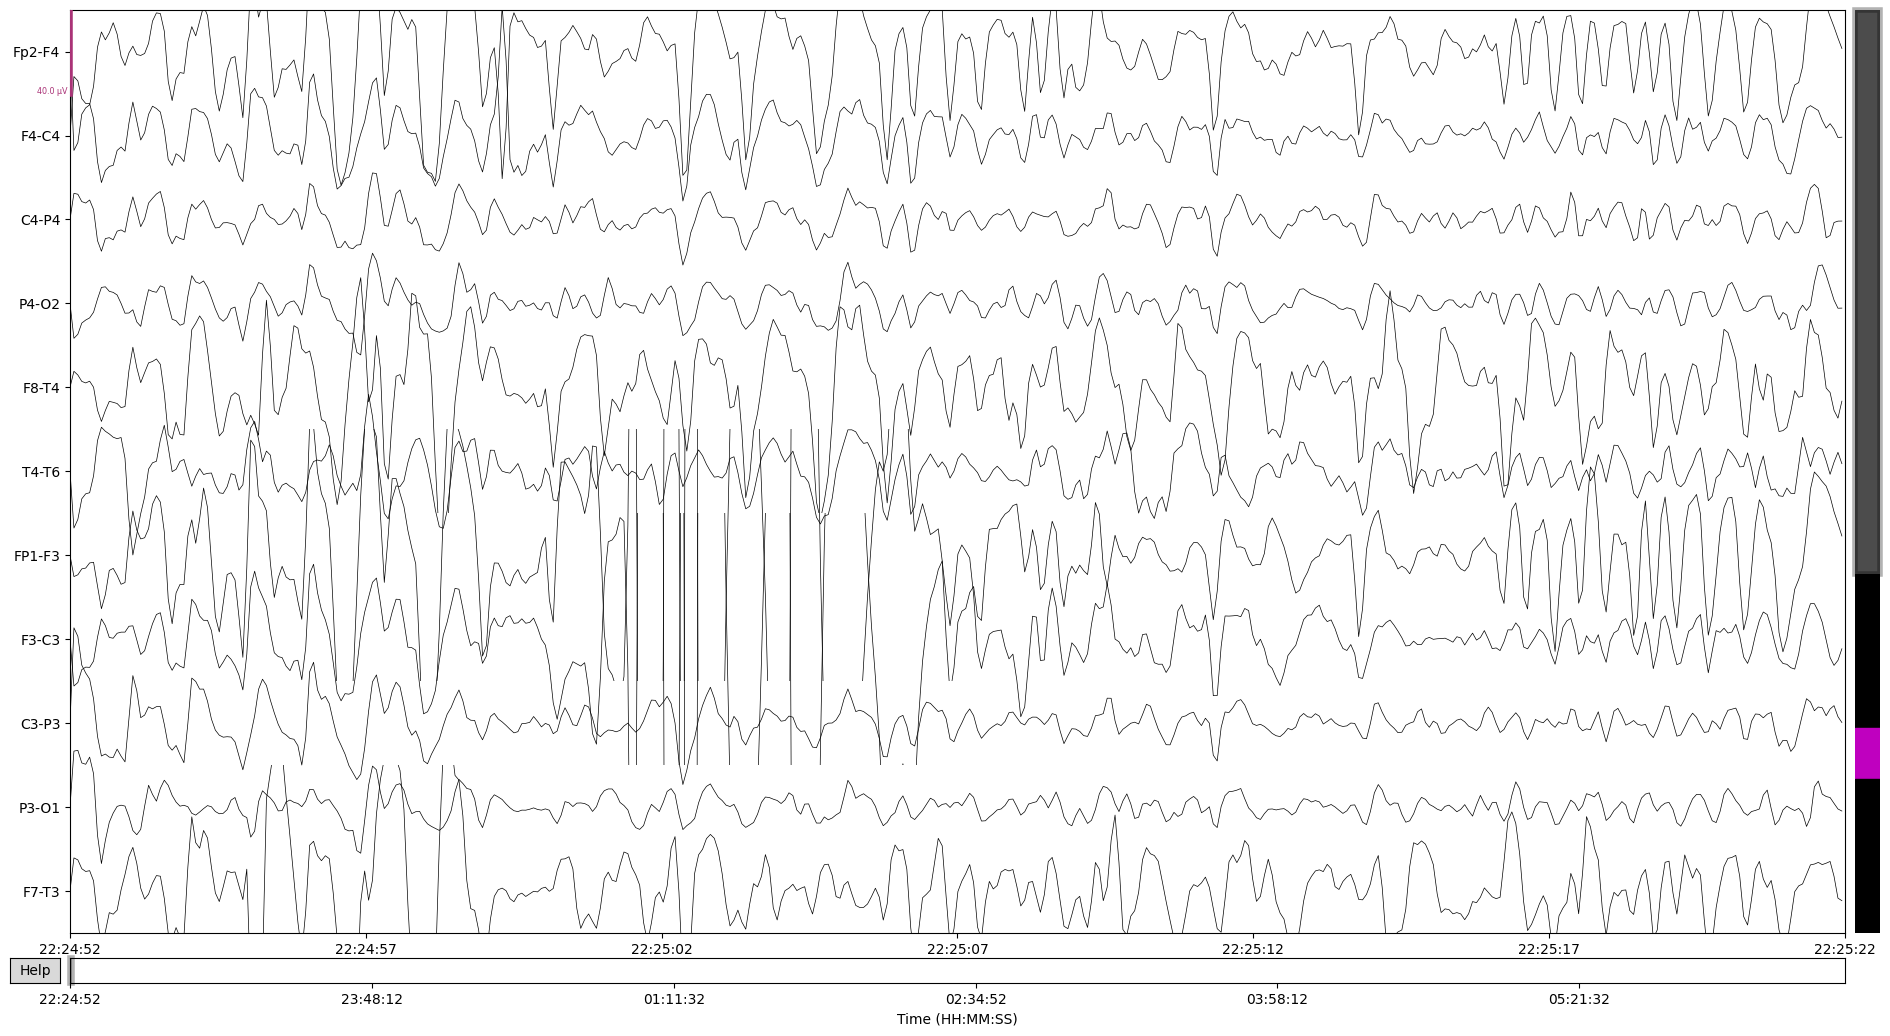

Channels marked as bad:
none


In [6]:
# events = np.array([[107520, 0, 1]])
raw.plot(verbose=False, highpass=.5, lowpass=5., time_format='clock', duration=30., n_channels=11)

### Rename channels (manually for the same previous reason)

In [7]:
# corrections for some subjects
# subject n2
# raw.rename_channels({'Fp2-F4': 'F2-F4'})
# subject n3
# raw.rename_channels({'Fp2-F4': 'F2-F4', 'FP1-F3': 'F1-F3'})
# subject n4
# mne.set_bipolar_reference(raw, 'EOG dx', 'EOG sin', ch_name='ROC-LOC', drop_refs=True, copy=False)
# raw.rename_channels({'Fp2-F4': 'F2-F4', 'deltoide': 'EMG1-EMG2', 'ekg': 'ECG1-ECG2'})
# subject n5
# raw.rename_channels({'Fp2-F4': 'F2-F4', 'FP1-F3': 'F1-F3'})
# subject n10
raw.rename_channels({'Fp2-F4': 'F2-F4', 'FP1-F3': 'F1-F3'})

<RawEDF | n10.edf, 18 x 15052800 (29400.0 s), ~2.02 GB, data loaded>

### Reading and grouping staging events

In [8]:
with open(annot_fname, 'r') as af:
    lines = af.readlines()

In [9]:
# Organize data as pandas DataFrames
df = None
idxs = False
name = 0
for l in lines:
    l = l.replace('\n', '')
    s = l.split('\t')
    if len(s) > 3:
        if idxs is False:
            idxs = s
        else:
            if df is None:
                df = pd.Series(s, index=idxs, name=name)
            else:
                _s = pd.Series(s, index=idxs, name=name)
                df = pd.concat([df, _s], axis=1)
            
            name+=1

df = df.T

if 'Position' in df.columns:
    df.drop('Position', axis=1, inplace=True)
    
af.close()

In [10]:
# They used an old staging, grouping together S3 and S4
df = df.replace('S4', 'S3')
print(df)

     Sleep Stage Time [hh:mm:ss]     Event Duration[s] Location
0              W        23:24:52  SLEEP-S0          30  ROC-LOC
1              W        23:25:22  SLEEP-S0          30  ROC-LOC
2              W        23:25:52  SLEEP-S0          30  ROC-LOC
3              W        23:26:22  SLEEP-S0          30  ROC-LOC
4              W        23:26:52  SLEEP-S0          30  ROC-LOC
...          ...             ...       ...         ...      ...
1106          S2        06:32:22  SLEEP-S2          30  ROC-LOC
1107          S2        06:32:52  SLEEP-S2          30  ROC-LOC
1108          S3        06:33:22  SLEEP-S3          30  ROC-LOC
1109          S3        06:33:52  SLEEP-S3          30  ROC-LOC
1110          S3        06:34:22  SLEEP-S3          30  ROC-LOC

[1111 rows x 5 columns]


In [11]:
# Re-computing duration in sec, based on times
dttm = pd.to_datetime(df['Time [hh:mm:ss]']).apply(lambda x: x + pd.DateOffset(days=1) if x.hour <=10 else x)
dttm_shift = pd.to_datetime(df['Time [hh:mm:ss]']).apply(lambda x: x + pd.DateOffset(days=1) if x.hour <=10 else x).shift(-1)
df['Duration[s]'] = (dttm_shift - dttm).dt.total_seconds()

In [12]:
df['Duration[s]']

0       30.0
1       30.0
2       30.0
3       30.0
4       30.0
        ... 
1106    30.0
1107    30.0
1108    30.0
1109    30.0
1110     NaN
Name: Duration[s], Length: 1111, dtype: float64

In [13]:
# Save to a .csv file (easy to use)
df.to_csv(op.join(path, sbj + '.csv'), index=False)

In [14]:
# Using dark time and recording starting time to define the first stage transition
record_start_time = raw.info['meas_date']
record_start_time = record_start_time.replace(tzinfo=None)
record_date = record_start_time.date()
score_start_time = pd.to_datetime(df['Time [hh:mm:ss]'])[0]
score_start_time = score_start_time.replace(record_date.year, record_date.month, record_date.day)
dark = (score_start_time - record_start_time).total_seconds()

In [15]:
# Defining distances between events (stage switch)
stage_codes = {'W': 0,
               'S1': 1,
               'S2': 2,
               'S3': 3,
               'S4': 3,
               'R': 4,
               'MT': -1}
sfreq = raw.info['sfreq']
events = []
_c, _s = df['Sleep Stage'][0], dark
for c, s in zip(df['Sleep Stage'], pd.to_numeric(df['Duration[s]'])):
    if c != _c:
        events.append([_s * sfreq, 0, stage_codes[c]])
        _s = 0
    _c = c
    _s += s

In [16]:
# Defining events array
tp = np.cumsum(np.array(events)[:, 0])
events = np.array(events)
events[:, 0] = tp

In [17]:
events

array([[ 2.810880e+06,  0.000000e+00,  1.000000e+00],
       [ 2.841600e+06,  0.000000e+00,  2.000000e+00],
       [ 2.964480e+06,  0.000000e+00,  3.000000e+00],
       [ 4.930560e+06,  0.000000e+00,  2.000000e+00],
       [ 5.160960e+06,  0.000000e+00,  4.000000e+00],
       [ 5.314560e+06,  0.000000e+00,  2.000000e+00],
       [ 5.591040e+06,  0.000000e+00,  0.000000e+00],
       [ 5.621760e+06,  0.000000e+00,  2.000000e+00],
       [ 5.821440e+06,  0.000000e+00,  3.000000e+00],
       [ 6.988800e+06,  0.000000e+00,  2.000000e+00],
       [ 7.127040e+06,  0.000000e+00,  4.000000e+00],
       [ 7.925760e+06,  0.000000e+00,  2.000000e+00],
       [ 8.494080e+06,  0.000000e+00,  3.000000e+00],
       [ 8.627712e+06,  0.000000e+00, -1.000000e+00],
       [ 8.632320e+06,  0.000000e+00,  2.000000e+00],
       [ 8.770560e+06,  0.000000e+00,  3.000000e+00],
       [ 1.003008e+07,  0.000000e+00,  2.000000e+00],
       [ 1.015296e+07,  0.000000e+00,  4.000000e+00],
       [ 1.061376e+07,  0.00

In [18]:
# Resample data to 500Hz 
raw, events = raw.resample(sfreq=500., events=events, n_jobs=-1)
events = events.astype('int')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   10.8s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   14.5s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   17.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   18.7s finished


In [19]:
# Creating events channel
# raw.load_data()
info = mne.create_info(['staging'], raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(np.zeros((1, len(raw.times))), info)
raw.add_channels([stim_raw], force_update_info=True)
raw.add_events(events, stim_channel='staging')

Creating RawArray with float64 data, n_channels=1, n_times=14700000
    Range : 0 ... 14699999 =      0.000 ... 29399.998 secs
Ready.


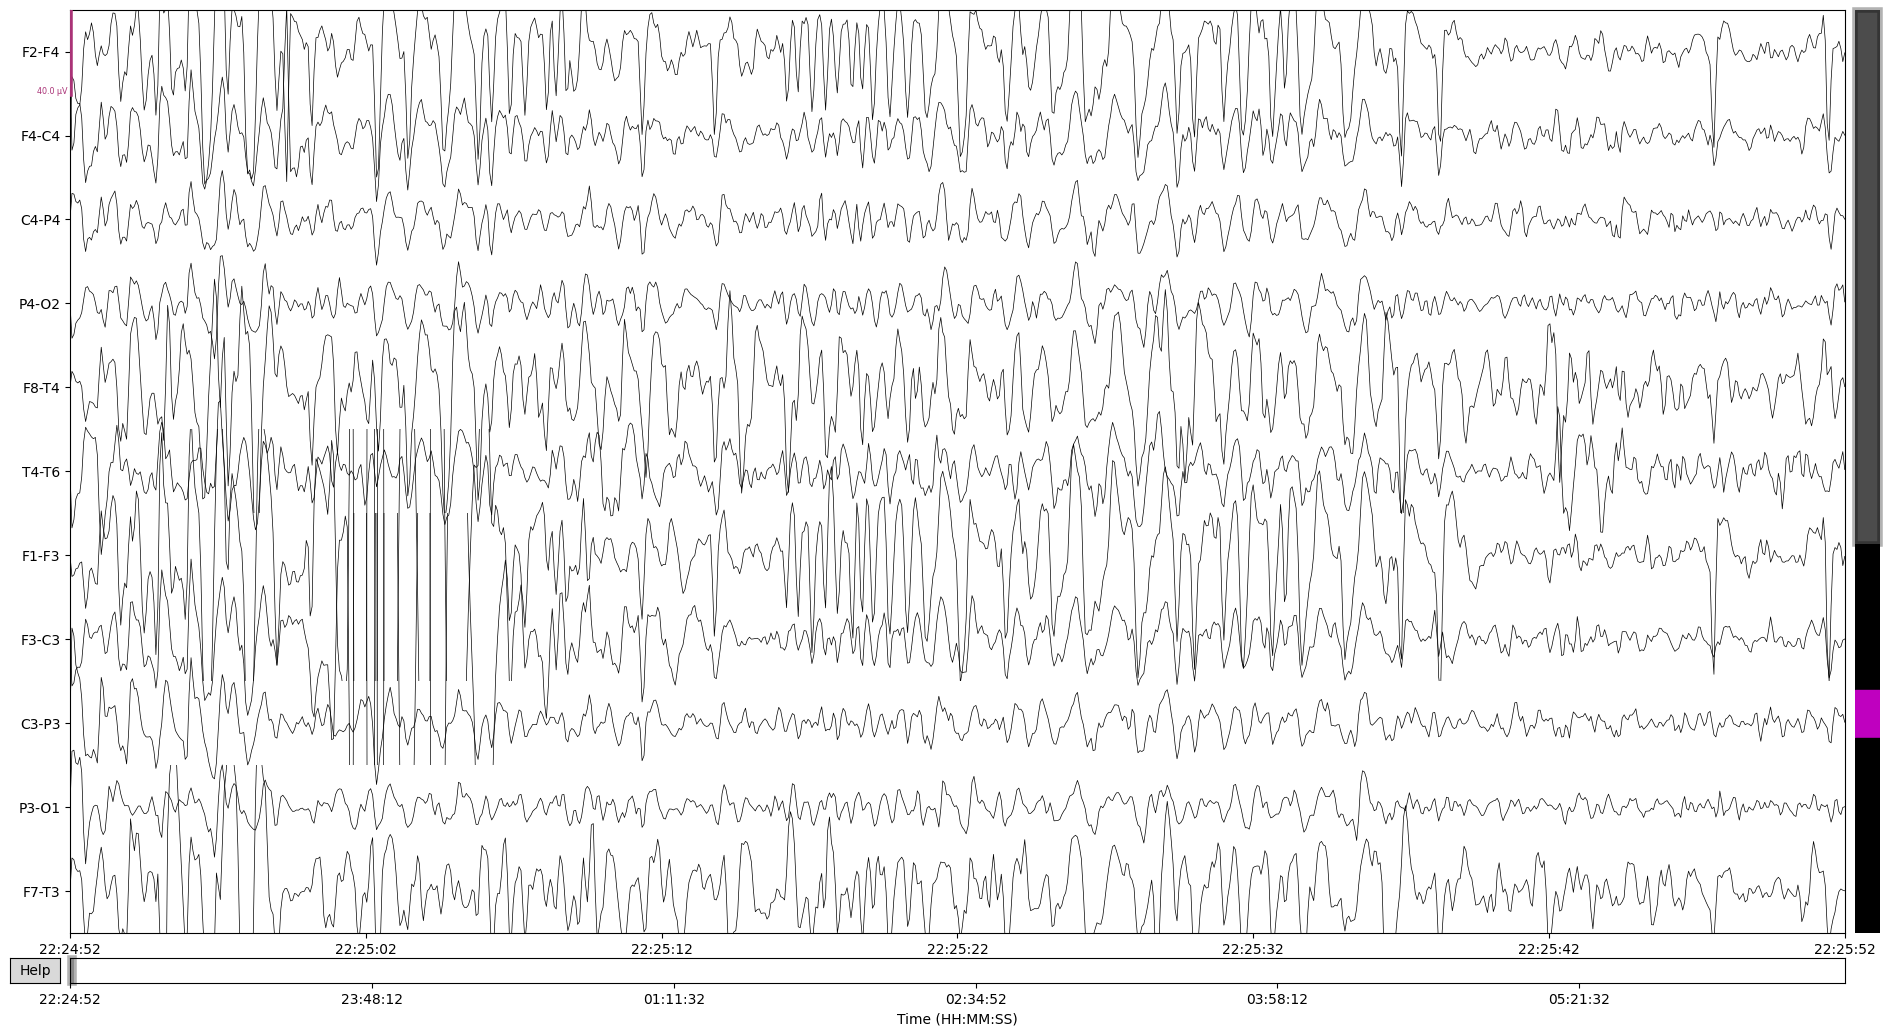

Channels marked as bad:
none


In [20]:
raw.plot(events=events, verbose=False, highpass=.5, lowpass=5., time_format='clock', duration=60., n_channels=11)

In [21]:
# Saving essential channels only and events
raw.pick_types(eeg=True, stim=True, eog=True, ecg=True, emg=True)
raw.save(raw_fname, overwrite=True)
mne.write_events(eve_fname, events, overwrite=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Overwriting existing file.
Writing /home/jerry/python_projects/space/closedloop/test_data/n10_raw.fif
Closing /home/jerry/python_projects/space/closedloop/test_data/n10_raw.fif
[done]
